In [1]:
# Configure Jupyter so figures appear in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
m = UNITS.meter
s = UNITS.second
kg =UNITS.kilogram

<Unit('kilogram')>

In [10]:
t_end=6e8 * s
# init=State(x1=1e12*m,
#            y1=1e12*m,
#            vx1=4000*m/s,
#            vy1=0*m/s,
#            x2=-1e12*m,
#            y2=-1e12*m,
#            vx2=0*m/s,
#            vy2=0*m/s)

x1=1e12
y1=-1e11
vx1=0
vy1=4000

x2=-1e12
y2=1e11
vx2=0
vy2=0
m1=1.989e30
m2=1.989e30



velocity1=Vector(vx1,vy1)
velocity2=Vector(vx2,vy2)
position1=Vector(x1,y1)
position2=Vector(x2,y2)
com_position=(position1*m1+position2*m2)/(m1+m2)
com_velocity=(velocity1*m1+velocity2*m2)/(m1+m2)
print(com_position,com_velocity)

# r=np.sqrt((init.x1-init.x2)**2+(init.y1-init.y2)**2)
# r1=(system.m2/(system.m1+system.m2))*r
# r2=(system.m1/(system.m1+system.m2))*r
# theta=np.arcsin((init.x1-init.x2)/r)


init=State(x1=x1-com_position.x,
           y1=y1-com_position.y,
           vx1=vx1-com_velocity.x,
           vy1=vy1-com_velocity.y,
           x2=x2-com_position.x,
           y2=y2-com_position.y,
           vx2=vx2-com_velocity.x,
           vy2=vy2-com_velocity.y)

# init=State(x1=r1*np.sin(theta)*m,
#            y1=r1*np.cos(theta)*m,
#            vx1=init.vx1-com_velocity.x,
#            vy1=init.vy1-com_velocity.y,
#            x2=r2*np.sin(pi+theta)*m,
#            y2=r2*np.cos(pi+theta)*m,
#            vx2=init.vx2-com_velocity.x,
#            vy2=init.vy2-com_velocity.y)
system = System(init=init, 
                m1=1.989e30, 
                m2=1.989e30, 
                G=6.67e-11, 
                t_end=t_end)
init




[0. 0.] dimensionless [   0. 2000.] dimensionless


,values
x1,1000000000000.0 dimensionless
y1,-100000000000.0 dimensionless
vx1,-0.0 dimensionless
vy1,2000.0 dimensionless
x2,-1000000000000.0 dimensionless
y2,100000000000.0 dimensionless
vx2,-0.0 dimensionless
vy2,-2000.0 dimensionless


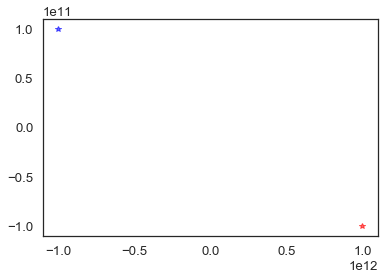

In [11]:
plot(init.x1,init.y1,'*',color='red')
plot(init.x2,init.y2,'*',color='blue')

In [12]:
def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x1,y1,vx1,vy1,x2,y2,vx2,vy2 = state
    unpack(system)
    velocity1=Vector(vx1,vy1)
    position1=Vector(x1,y1)
    velocity2=Vector(vx2,vy2)
    position2=Vector(x2,y2)
    r=sqrt((x1-x2)**2+(y1-y2)**2)
    force=-G*m1*m2/(r**2)

    acceleration1=force/m1
    acceleration2=force/m2
    dx1dt=vx1
    dy1dt=vy1
    dx2dt=vx2
    dy2dt=vy2
    theta1=position1.angle
    theta2=position2.angle
    dvx1dt,dvy1dt=pol2cart(theta1,acceleration1)
    dvx2dt,dvy2dt=pol2cart(theta2,acceleration2)
#     dvx1dt=acceleration1*np.cos(theta1)
#     dvy1dt=acceleration1*np.sin(theta1)
#     dvx2dt=acceleration2*np.cos(theta2)
#     dvy2dt=acceleration2*np.sin(theta2)
    

    
    return dx1dt,dy1dt,dvx1dt,dvy1dt,dx2dt,dy2dt,dvx2dt,dvy2dt

In [13]:
results, details = run_ode_solver(system, slope_func,max_step=1e6)
details

,values
sol,None
t_events,[]
nfev,3644
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


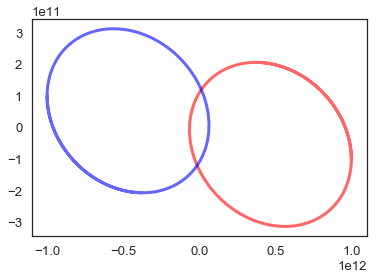

In [14]:
plot(results.x1,results.y1,'red')
plot(results.x2,results.y2,'blue')

In [15]:
# from mpl_toolkits.mplot3d import Axes3D

In [16]:
# from mpl_toolkits.mplot3d import axes3d
# import matplotlib.pyplot as plt


# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # Grab some test data.
# X, Y, Z = axes3d.get_test_data(0.05)

# # Plot a basic wireframe.
# ax.scatter(results.x1, results.y1, results.index)
# ax.scatter(results.x2, results.y2, results.index)
# plt.show()
